In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'

In [2]:
# %%bash
# cd hardware/victims/firmware/
# # mkdir -p simpleserial-nn && cp -r neuralnetwork/* $_
# cd simpleserial-nn

In [3]:
%%bash -s "$PLATFORM"
cd hardware/victims/firmware/simpleserial-nn
make PLATFORM=$1 CRYPTO_TARGET=NONE

SS_VER set to SS_VER_1_1
C:/Users/parth/CHIPWH~1/cw/home/portable/avrgcc/bin/make clean_objs .dep 
make[1]: Entering directory 'C:/Users/parth/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/simpleserial-nn'
SS_VER set to SS_VER_1_1
rm -f -- simpleserial-base-CWLITEARM.hex
rm -f -- simpleserial-base-CWLITEARM.eep
rm -f -- simpleserial-base-CWLITEARM.cof
rm -f -- simpleserial-base-CWLITEARM.elf
rm -f -- simpleserial-base-CWLITEARM.map
rm -f -- simpleserial-base-CWLITEARM.sym
rm -f -- simpleserial-base-CWLITEARM.lss
rm -f -- objdir-CWLITEARM/*.o
rm -f -- objdir-CWLITEARM/*.lst
rm -f -- simpleserial-base.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- simpleserial-base.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- simpleserial-base.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i
make[1]: '.dep' is up to date.
make[1]: Leaving directory 'C:/Users/parth/ChipWhisperer5_64/cw/ho

simpleserial-base.c: In function 'printaccuracy':
simpleserial-base.c:241:11: warning: variable 'accu_train' set but not used [-Wunused-but-set-variable]
  241 |     float accu_train = 0.0;
      |           ^~~~~~~~~~
simpleserial-base.c: In function 'optimize':
simpleserial-base.c:165:24: warning: 'db' may be used uninitialized in this function [-Wmaybe-uninitialized]
  165 |     infovec[dim+dim+1] = db;
      |     ~~~~~~~~~~~~~~~~~~~^~~~


In [6]:
# import chipwhisperer as cw
# try:
#     if not scope.connectStatus:
#         scope.con()
# except NameError:
#     scope = cw.scope()
   
# try:
#     target = cw.target(scope)
# except IOError:
#     print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
#     print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
#     scope = cw.scope()
#     target = cw.target(scope)

# print("INFO: Found ChipWhisperer😍")

# if "STM" in PLATFORM or PLATFORM == "CWLITEARM" or PLATFORM == "CWNANO":
#     prog = cw.programmers.STM32FProgrammer
# elif PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
#     prog = cw.programmers.XMEGAProgrammer
# else:
#     prog = None
    
# import time
# time.sleep(0.05)
# scope.default_setup()
# def reset_target(scope):
#     if PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
#         scope.io.pdic = 'low'
#         time.sleep(0.05)
#         scope.io.pdic = 'high_z' #XMEGA doesn't like pdic driven high
#         time.sleep(0.05)
#     else:  
#         scope.io.nrst = 'low'
#         time.sleep(0.05)
#         scope.io.nrst = 'high_z'
#         time.sleep(0.05)

INFO: Found ChipWhisperer😍


In [4]:
## automation
import chipwhisperer as cw
import pandas as pd
import os

def capture_trace(_ignored=None):
    ktp = cw.ktp.Basic()
    key, text = ktp.next()
    return cw.capture_trace(scope, target, text).wave

file = 'LOR.csv'
for i in range(200):
    try:
        if not scope.connectStatus:
            scope.con()
    except NameError:
        scope = cw.scope()

    try:
        target = cw.target(scope)
    except IOError:
        print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
        print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
        scope = cw.scope()
        target = cw.target(scope)

    print("INFO: Found ChipWhisperer😍")

    if "STM" in PLATFORM or PLATFORM == "CWLITEARM" or PLATFORM == "CWNANO":
        prog = cw.programmers.STM32FProgrammer
    elif PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
        prog = cw.programmers.XMEGAProgrammer
    else:
        prog = None

    import time
    time.sleep(0.05)
    scope.default_setup()
    def reset_target(scope):
        if PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
            scope.io.pdic = 'low'
            time.sleep(0.05)
            scope.io.pdic = 'high_z' #XMEGA doesn't like pdic driven high
            time.sleep(0.05)
        else:  
            scope.io.nrst = 'low'
            time.sleep(0.05)
            scope.io.nrst = 'high_z'
            time.sleep(0.05)
            
            
    cw.program_target(scope, prog, "hardware/victims/firmware/simpleserial-nn/simpleserial-base-{}.hex".format(PLATFORM))
    
    
    wave = capture_trace()
    print("😍ok to continue")
    df = pd.DataFrame(wave)
    olddf = pd.read_csv('LOR.csv')
    if(os.path.exists(file) and os.path.isfile(file)):
        os.remove(file)
        print("file deleted")
        
    finaldf = pd.concat([olddf, df], axis=1)
    
    print(finaldf.shape)
    finaldf.to_csv('LOR.csv',index = False)

    

(ChipWhisperer NAEUSB WARNING|File naeusb.py:701) Your firmware (0.30) is outdated - latest is 0.62See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 2)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 3)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 4)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 5)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 6)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 7)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 8)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 9)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 10)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 11)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 12)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 13)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 14)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 15)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 16)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 17)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 18)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 19)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 20)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 21)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 22)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 23)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 24)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 25)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 26)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 27)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 28)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 29)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 30)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 31)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 32)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 33)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 34)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 35)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 36)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 37)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 38)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 39)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 40)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 41)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 42)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 43)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 44)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 45)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 46)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 47)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 48)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 49)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 50)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 51)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 52)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 53)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 54)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 55)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 56)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 57)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 58)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 59)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 60)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 61)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 62)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 63)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 64)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 65)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 66)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 67)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 68)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 69)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 70)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 71)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 72)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 73)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 74)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 75)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 76)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 77)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 78)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 79)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 80)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 81)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 82)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 83)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 84)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 85)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 86)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 87)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 88)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 89)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 90)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 91)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 92)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 93)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 94)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 95)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 96)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 97)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 98)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 99)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 100)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 101)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 102)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 103)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 104)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 105)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 106)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 107)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 108)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 109)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 110)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 111)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 112)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 113)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 114)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 115)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 116)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 117)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 118)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 119)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 120)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 121)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 122)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 123)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 124)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 125)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 126)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 127)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 128)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 129)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 130)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 131)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 132)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 133)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 134)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 135)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 136)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 137)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 138)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 139)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 140)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 141)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 142)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 143)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 144)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 145)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 146)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 147)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 148)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 149)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 150)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 151)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 152)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 153)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 154)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 155)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 156)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 157)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 158)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 159)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 160)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 161)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 162)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 163)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 164)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 165)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 166)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 167)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 168)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 169)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 170)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 171)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 172)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 173)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 174)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 175)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 176)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 177)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 178)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 179)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 180)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 181)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 182)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 183)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 184)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 185)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 186)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 187)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 188)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 189)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 190)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 191)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 192)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 193)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 194)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 195)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 196)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 197)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 198)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 199)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 200)
INFO: Found ChipWhisperer😍
Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 21323 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 21323 bytes


(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue
file deleted
(5000, 201)


In [10]:
cw.program_target(scope, prog, "hardware/victims/firmware/simpleserial-nn/simpleserial-base-{}.hex".format(PLATFORM))

Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11843 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11843 bytes


In [11]:
def capture_trace(_ignored=None):
    ktp = cw.ktp.Basic()
    key, text = ktp.next()
    return cw.capture_trace(scope, target, text).wave

In [12]:
wave = capture_trace()
print("😍ok to continue")

(ChipWhisperer Target WARNING|File SimpleSerial.py:397) Unexpected start to command: 


😍ok to continue


In [13]:
import pandas as pd

df = pd.DataFrame(wave)
df.to_csv('new.csv')

<IPython.core.display.Javascript object>


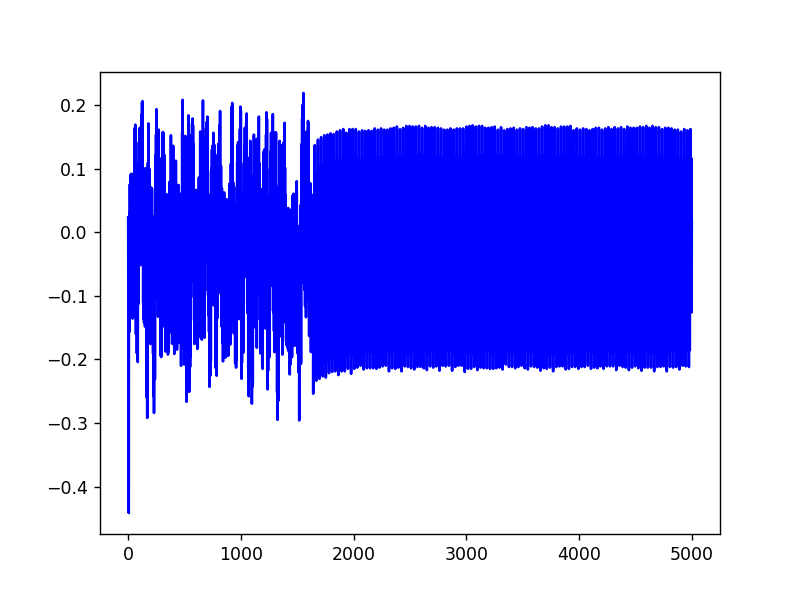

In [14]:
%matplotlib notebook
import matplotlib.pylab as plt
#plt.style.use('white_background')
plt.figure()
plt.plot(wave, 'b')
plt.show()

In [12]:
wave.shape

(5000,)

In [13]:
min(wave)

-0.4658203125

In [14]:
max(wave)

0.2314453125